## _*Quantum SVM kernel algorithm:  multiclass classifier extension*_

A multiclass extension works in conjunction with an underlying binary (two class) classifier to provide multiclass classification.

Currently three different multiclass extensions are supported:

* OneAgainstRest
* AllPairs
* ErrorCorrectingCode

These use different techniques to group the data with binary classification to achieve the final multiclass classification.

In [16]:

from qiskit import Aer
from qiskit_aqua.input import SVMInput
from qiskit_aqua import run_algorithm
import numpy as np

Here we choose the `Wine` dataset which has 3 classes.

In [32]:
import os
os.environ['KERAS_BACKEND' ] = 'tensorflow'
os.environ['MKL_THREADING_LAYER'] = 'GNU'
import keras as ks
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import TensorBoard
import keras
import pandas as pd
import numpy as np
from keras import optimizers
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dropout, Activation
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import time 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def main():
    class_labels = [r'A', r'B']
    # Set seed for reproducibility
    NAME = "MLP"
    np.random.seed(0)
    print("Loading data...")
    # Load the data from the CSV files
    training_data = pd.read_csv('numerai_training_data.csv', header=0)
    print('original train data shape: {},\t{} \n\n \t:'.format(training_data.shape[0],training_data.shape[1]))

    prediction_data = pd.read_csv('numerai_tournament_data.csv', header=0)
    print('original prediction data shape: {},\t{} \n\n \t:'.format(prediction_data.shape[0],prediction_data.shape[1]))
    
    complete_training_data = pd.concat([training_data, prediction_data])
    print('total training / valdation shape {}'.format(complete_training_data))
    
    # Transform the loaded CSV data into numpy arrays

    features = [f for f in list(training_data) if "feature" in f]
    print(features)

    X = training_data[features]
#     mini= MinMaxScaler(feature_range=(0,1)) 
#     X = mini.fit_transform(X)

    Y = training_data["target_frank"]
    Y= keras.utils.to_categorical(Y,2) 

    x_prediction = prediction_data[features]
#     x_prediction = mini.fit_transform(x_prediction)

    ids = prediction_data["id"]  
    n = 1  # dimension of each data point
    
    from sklearn.decomposition import PCA
    sample_train, sample_test, label_train, label_test = train_test_split(X,Y, test_size=.67, random_state=7)
    std_scale = StandardScaler()
    X = std_scale.fit_transform(sample_train)


    pca = PCA(n_components=2)
    sample_train = pca.fit_transform(X)
    sample_test = pca.fit_transform(x_prediction)
    

    # Scale to the range (-1,+1)
    samples = np.append(sample_train, sample_test, axis=0)
    minmax_scale = MinMaxScaler((0, 1))
    X = minmax_scale.fit_transform(sample_train)
    x_prediction = minmax_scale.fit_transform(sample_test)
    # Pick training size number of samples from each distro




    print('finished')

#     sample_Total, training_input, test_input, class_labels = train_test_split(X,test_size=.67)

#     print(sample_Total.shape[0]) 
#     print(sample_Total.shape[1])

#     temp = [x_prediction[k] for k in x_prediction]
#     total_array = np.concatenate(temp)
if __name__ == '__main__':

    main()

Loading data...
original train data shape: 502732,	60 

 	:
original prediction data shape: 333924,	60 

 	:
total training / valdation shape                       id   era data_type  feature1  feature2  feature3  \
0       n0003126ff2349f6  era1     train   0.54836   0.31077   0.37524   
1       n003d773d29b57ec  era1     train   0.34712   0.40275   0.42747   
2       n0074df2dc6810b6  era1     train   0.50871   0.48639   0.47544   
3       n0090630f530903e  era1     train   0.61363   0.40268   0.53779   
4       n00af19089546fe9  era1     train   0.30704   0.47273   0.54495   
5       n011d2da12b1e735  era1     train   0.52336   0.59136   0.60506   
6       n014149cadeee55d  era1     train   0.30875   0.62510   0.35229   
7       n0148a4dcf539aba  era1     train   0.40632   0.30590   0.43227   
8       n015855690d31908  era1     train   0.48193   0.27060   0.50228   
9       n0169447f4d6a10e  era1     train   0.51191   0.53663   0.42109   
10      n01703ba4eff8fe7  era1     train   0

[[ 1.51955835  2.5696983 ]
 [-5.62540317 -0.68585251]
 [ 3.88984766 -2.86869062]
 [-3.46167742  3.5214927 ]
 [ 2.2147603   2.17571788]
 [-1.68307229  1.49929637]
 [ 0.46919381 -3.46111533]
 [ 0.66479552 -0.57761369]
 [-1.29227826 -1.00709289]
 [ 1.21147978 -0.4314808 ]]
[[0.56615703 0.63672183]
 [0.18298252 0.444019  ]
 [0.6932724  0.31481226]
 [0.29902017 0.69306053]
 [0.60343976 0.61340131]
 [0.39440433 0.57336251]
 [0.50982742 0.27974541]
 [0.52031727 0.45042588]
 [0.41536208 0.42500411]
 [0.5496352  0.45907579]]
finished


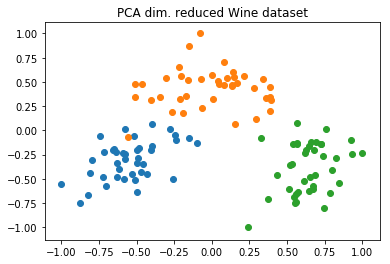

AttributeError: 'dict' object has no attribute 'shape'

In [3]:
n = 2  # dimension of each data point

sample_Total, training_input, test_input, class_labels = Wine(training_size=40,
                                                              test_size=10, n=n, PLOT_DATA=True)

print(sample_Total.shape[0]) 
print(sample_Total.shape[1])

temp = [test_input[k] for k in test_input]
total_array = np.concatenate(temp)

Now we setup an Aqua configuration dictionary to use the quantum `QSVMKernel` algorithm and add a multiclass extension to classify the Wine data set, since it has 3 classes.

Although the `AllPairs` extension is used here in the example the following multiclass extensions would also work:

    'multiclass_extension': {'name': 'OneAgainstRest'}
    'multiclass_extension': {'name': 'ErrorCorrectingCode', 'code_size': 5}

In [3]:
aqua_dict = {
    'problem': {'name': 'svm_classification', 'random_seed': 10598},
    'algorithm': {
        'name': 'QSVM.Kernel'
    },
    'feature_map': {'name': 'SecondOrderExpansion', 'depth': 2, 'entangler_map': {0: [1]}},
    'multiclass_extension': {'name': 'AllPairs'},
    'backend': {'shots': 1024}
}

backend = Aer.get_backend('qasm_simulator')
algo_input = SVMInput(training_input, test_input, total_array)
result = run_algorithm(aqua_dict, algo_input, backend=backend)
for k,v in result.items():
    print("'{}' : {}".format(k, v))


'testing_accuracy' : 0.8695652173913043
'test_success_ratio' : 0.8695652173913043
'predicted_labels' : [0 0 0 0 0 0 1 0 0 0 1 2 1 1 1 0 1 1 1 1 2 2 2]
'predicted_classes' : ['A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'B', 'C', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'C']
